In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Load the dataset
df = pd.read_csv('/content/gdrive/MyDrive/Machine Learning Project/CarPrice_Assignment.csv')
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (205, 26)

First few rows:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
    # Basic data exploration
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null

In [ ]:
print("\nMissing Values:")
# print(df.isnull())
print(df.isnull().sum())



Missing Values:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:

# Check for missing values
print("Missing values before imputation:")
missing_values = df.isnull().sum()
print(missing_values)
print(missing_values[missing_values > 0])

Missing values before imputation:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
Series([], dtype: int64)


In [ ]:
# Since there are no missing values in this dataset, let's demonstrate imputation techniques
# by artificially creating some missing values for demonstration

# Create a copy and introduce missing values for demonstration
df_demo = df.copy()

# Introduce 5% missing values in numeric columns
np.random.seed(42)
numeric_cols = df_demo.select_dtypes(include=[np.number]).columns
for col in numeric_cols[:5]:  # First 5 numeric columns
    mask = np.random.random(len(df_demo)) < 0.05
    df_demo.loc[mask, col] = np.nan

print("\nMissing values after introducing artificial missing values:")
print(df_demo.isnull().sum().sum())
print(df_demo.isnull().sum()[df_demo.isnull().sum() > 0])


Missing values after introducing artificial missing values:
56
car_ID       11
symboling    16
wheelbase    10
carlength     4
carwidth     15
dtype: int64


In [ ]:
df_demo.shape

(205, 26)

## Imputation techniques

In [ ]:
# Imputation techniques
print("\n--- Imputation Techniques ---")


--- Imputation Techniques ---


In [ ]:
df_demo.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,NaN,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2.0,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3.0,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4.0,NaN,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5.0,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# 1. Mean Imputation for numeric columns

In [ ]:
df_mean = df_demo.copy()
numeric_imputer = SimpleImputer(strategy='mean')
df_mean[numeric_cols] = numeric_imputer.fit_transform(df_mean[numeric_cols])
df_mean.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,0.809524,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2.0,3.000000,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3.0,1.000000,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4.0,0.809524,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5.0,2.000000,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


# 2. Median Imputation

In [ ]:
df_median = df_demo.copy()
numeric_imputer_median = SimpleImputer(strategy='median')
df_median[numeric_cols] = numeric_imputer_median.fit_transform(df_median[numeric_cols])


# 3. KNN Imputation

In [ ]:
df_knn = df_demo.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[numeric_cols] = knn_imputer.fit_transform(df_knn[numeric_cols])


# 4. Mode Imputation for categorical columns

In [ ]:
categorical_cols = df_demo.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_mean[categorical_cols] = categorical_imputer.fit_transform(df_mean[categorical_cols])


In [ ]:
print("Missing values after imputation (mean strategy):", df_mean.isnull().sum().sum())

Missing values after imputation (mean strategy): 0


## Outlier Detection and Handling


--- Outlier Detection and Handling ---


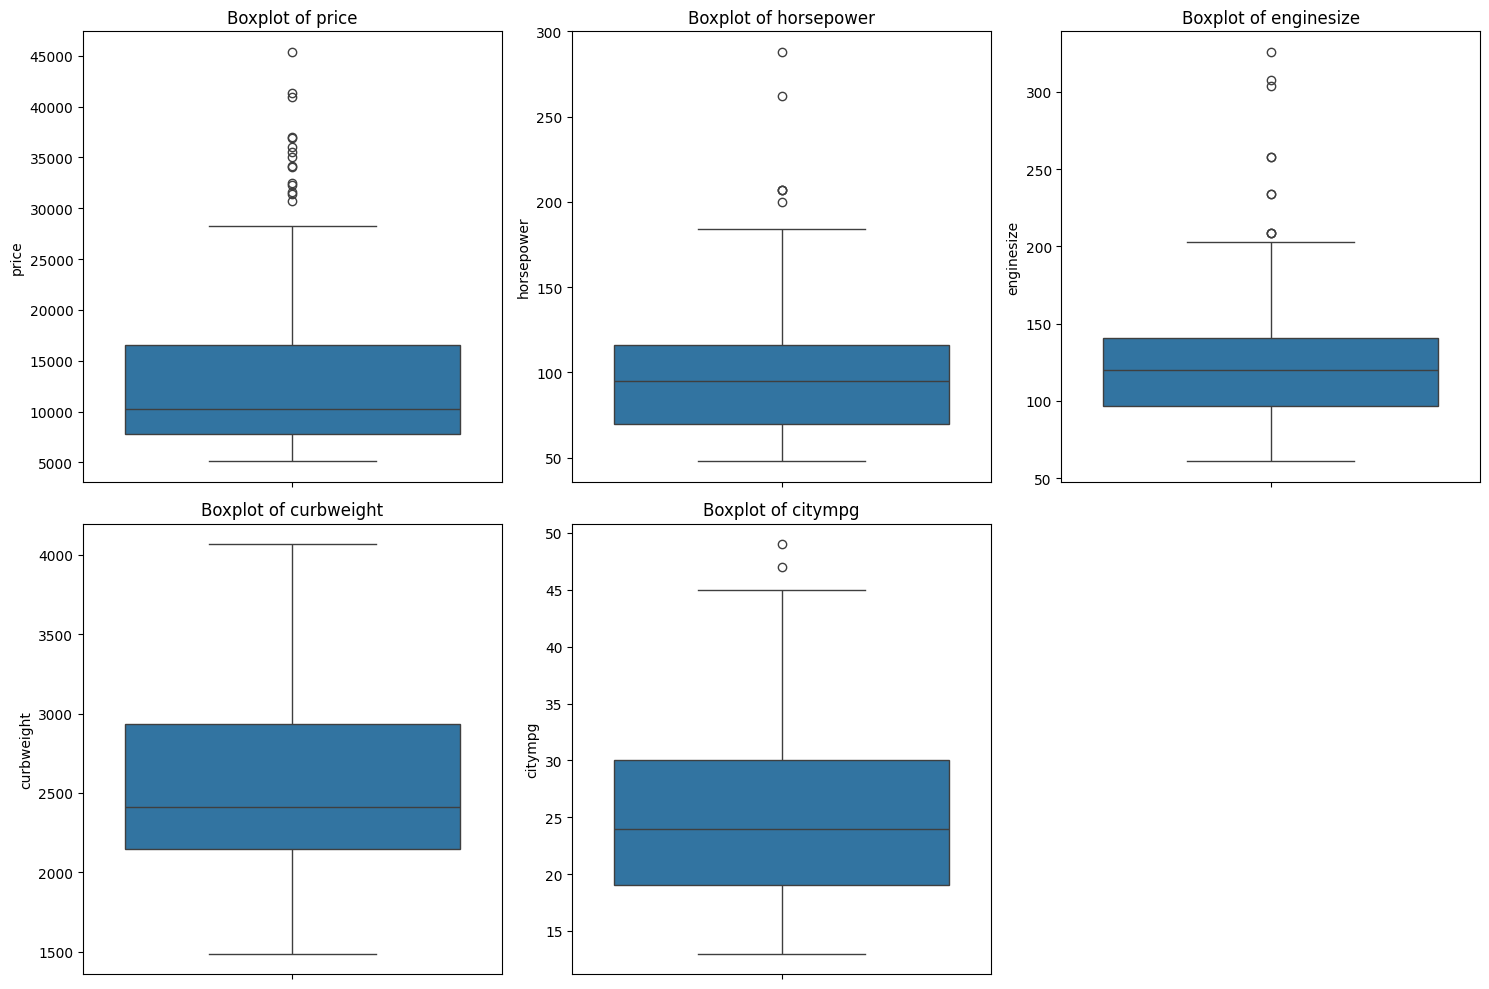

In [ ]:
print("\n--- Outlier Detection and Handling ---")

# Use the original dataset without artificial missing values for outlier detection
df_clean = df.copy()

# Identify numeric columns for outlier detection
numeric_cols_outlier = ['price', 'horsepower', 'enginesize', 'curbweight', 'citympg']

# Visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols_outlier, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Outlier detection using Z-score

In [ ]:
print("\nOutlier detection using Z-score (threshold = 3):")
z_scores = np.abs(stats.zscore(df_clean[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")


Outlier detection using Z-score (threshold = 3):
Number of outliers detected: 24


# Outlier detection using IQR

In [ ]:
def detect_outliers_iqr(df, columns):
    outlier_mask = pd.Series([False] * len(df))
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        col_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_mask = outlier_mask | col_outliers
    return outlier_mask

iqr_outliers = detect_outliers_iqr(df_clean, numeric_cols_outlier)
print(f"Number of outliers detected using IQR: {iqr_outliers.sum()}")

Number of outliers detected using IQR: 18


# Outlier handling - Capping (Winsorizing)

In [ ]:
df_no_outliers = df_clean.copy()
for col in numeric_cols_outlier:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df_no_outliers[col] = np.where(df_no_outliers[col] < lower_bound, lower_bound, df_no_outliers[col])
    df_no_outliers[col] = np.where(df_no_outliers[col] > upper_bound, upper_bound, df_no_outliers[col])

print("Outliers handled using capping method")

Outliers handled using capping method


Encoding Categorical Data

In [ ]:
df_clean


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [ ]:
print("\n--- Encoding Categorical Data ---")

# Extract car company from CarName
df_clean['carCompany'] = df_clean['CarName'].apply(lambda x: x.split()[0])
print(df_clean['CarName'])
print(df_clean['carCompany'])




--- Encoding Categorical Data ---
0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object
0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: carCompany, Length: 205, dtype: object


In [ ]:
df_clean.shape

(205, 27)

In [ ]:
# Identify categorical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody',
                      'drivewheel', 'enginelocation', 'enginetype',
                      'cylindernumber', 'fuelsystem', 'carCompany']

print("Original categorical columns:")
for col in categorical_columns:
    print(f"{col}: {df_clean[col].nunique()} unique values")



Original categorical columns:
fueltype: 2 unique values
aspiration: 2 unique values
doornumber: 2 unique values
carbody: 5 unique values
drivewheel: 3 unique values
enginelocation: 2 unique values
enginetype: 7 unique values
cylindernumber: 7 unique values
fuelsystem: 8 unique values
carCompany: 28 unique values


In [ ]:
df_clean["doornumber"]

,doornumber
0,two
1,two
2,two
3,four
4,four
...,...
200,four
201,four
202,four
203,four


In [ ]:
# Label Encoding for ordinal categories
df_encoded = df_clean.copy()
label_encoders = {}

for col in ['doornumber', 'cylindernumber']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"Label encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")



Label encoded doornumber: {'four': np.int64(0), 'two': np.int64(1)}
Label encoded cylindernumber: {'eight': np.int64(0), 'five': np.int64(1), 'four': np.int64(2), 'six': np.int64(3), 'three': np.int64(4), 'twelve': np.int64(5), 'two': np.int64(6)}


In [ ]:
df_encoded["cylindernumber"]

,cylindernumber
0,2
1,2
2,3
3,2
4,1
...,...
200,2
201,2
202,3
203,3


In [ ]:
# One-Hot Encoding for nominal categories
nominal_columns = [col for col in categorical_columns if col not in ['doornumber', 'cylindernumber']]
df_encoded = pd.get_dummies(df_encoded, columns=nominal_columns, prefix=nominal_columns)
df_encoded


,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,carCompany_porsche,carCompany_renault,carCompany_saab,carCompany_subaru,carCompany_toyota,carCompany_toyouta,carCompany_vokswagen,carCompany_volkswagen,carCompany_volvo,carCompany_vw
0,1,3,alfa-romero giulia,1,88.6,168.8,64.1,48.8,2548,2,...,False,False,False,False,False,False,False,False,False,False
1,2,3,alfa-romero stelvio,1,88.6,168.8,64.1,48.8,2548,2,...,False,False,False,False,False,False,False,False,False,False
2,3,1,alfa-romero Quadrifoglio,1,94.5,171.2,65.5,52.4,2823,3,...,False,False,False,False,False,False,False,False,False,False
3,4,2,audi 100 ls,0,99.8,176.6,66.2,54.3,2337,2,...,False,False,False,False,False,False,False,False,False,False
4,5,2,audi 100ls,0,99.4,176.6,66.4,54.3,2824,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,109.1,188.8,68.9,55.5,2952,2,...,False,False,False,False,False,False,False,False,True,False
201,202,-1,volvo 144ea,0,109.1,188.8,68.8,55.5,3049,2,...,False,False,False,False,False,False,False,False,True,False
202,203,-1,volvo 244dl,0,109.1,188.8,68.9,55.5,3012,3,...,False,False,False,False,False,False,False,False,True,False
203,204,-1,volvo 246,0,109.1,188.8,68.9,55.5,3217,3,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
print(f"\nShape after encoding: {df_encoded.shape}")
print(f"Number of features after encoding: {len(df_encoded.columns)}")


Shape after encoding: (205, 76)
Number of features after encoding: 76



Data Scaling & Normalization

In [ ]:
print("\n--- Data Scaling & Normalization ---")

# Separate features and target
X = df_encoded.drop(['car_ID', 'CarName', 'price'], axis=1)
y = df_encoded['price']

# Identify numeric columns for scaling
numeric_cols_scale = X.select_dtypes(include=[np.number]).columns

print(f"Features to scale: {list(numeric_cols_scale)}")

# Standardization (Z-score Normalization)
scaler_standard = StandardScaler()
X_standardized = X.copy()
X_standardized[numeric_cols_scale] = scaler_standard.fit_transform(X_standardized[numeric_cols_scale])

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_minmax = X.copy()
X_minmax[numeric_cols_scale] = scaler_minmax.fit_transform(X_minmax[numeric_cols_scale])

print("Scaling completed:")
print("Standardized data - Mean ~ 0, Std ~ 1")
print("Min-Max scaled data - Range [0, 1]")




--- Data Scaling & Normalization ---
Features to scale: ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
Scaling completed:
Standardized data - Mean ~ 0, Std ~ 1
Min-Max scaled data - Range [0, 1]


In [ ]:
X_standardized[numeric_cols_scale]

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.743470,1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.147475,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,1.743470,1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.147475,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,0.133509,1.130388,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,1.112210,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,0.938490,-0.884652,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.147475,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,0.938490,-0.884652,0.107110,0.207256,0.230001,0.235942,0.516807,-1.407161,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,-0.884652,1.721873,1.198549,1.398245,0.728239,0.763241,-0.147475,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490
201,-1.476452,-0.884652,1.721873,1.198549,1.351515,0.728239,0.949992,-0.147475,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195
202,-1.476452,-0.884652,1.721873,1.198549,1.398245,0.728239,0.878757,1.112210,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332
203,-1.476452,-0.884652,1.721873,1.198549,1.398245,0.728239,1.273437,1.112210,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059


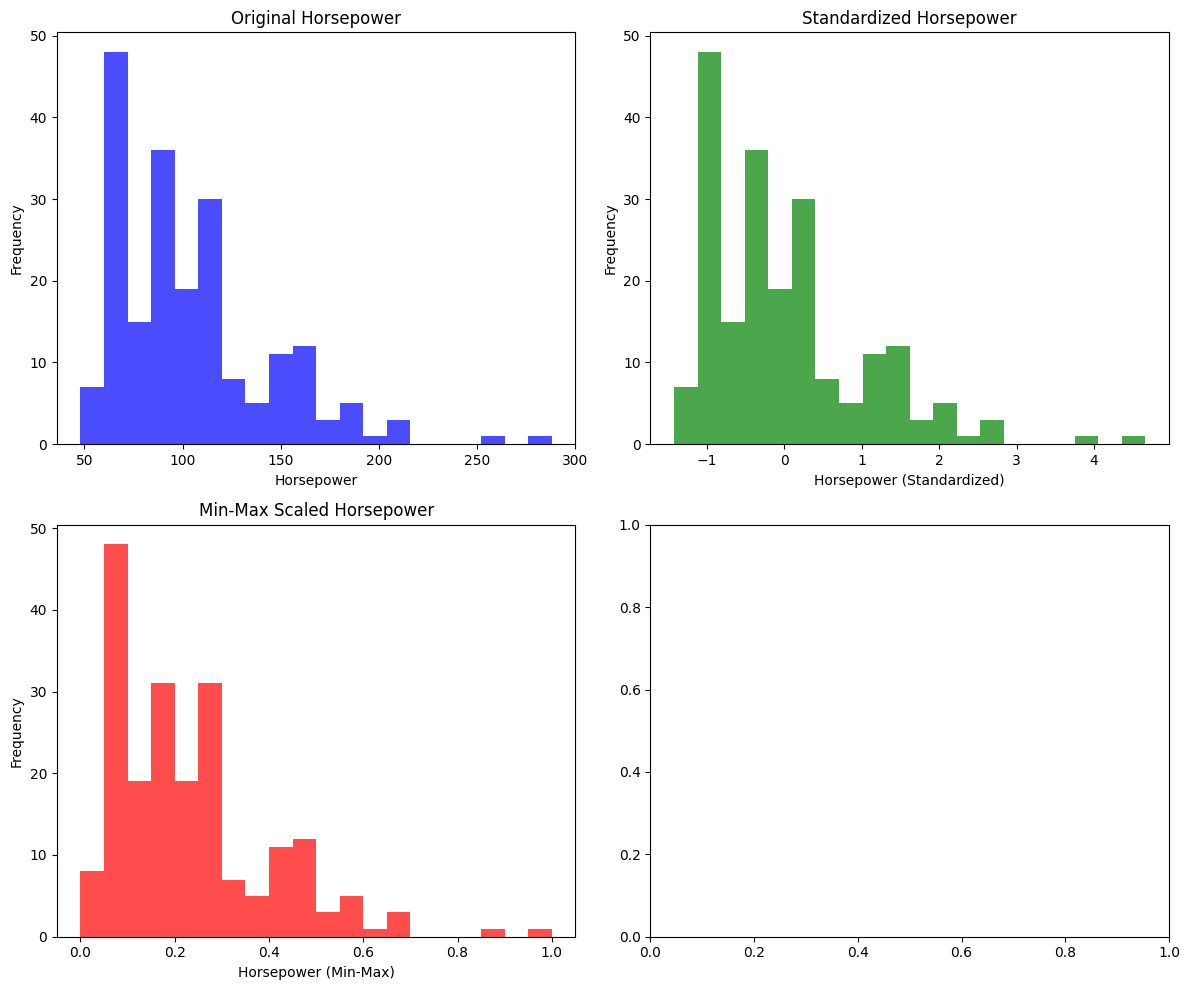

In [ ]:
# Compare distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original data
axes[0, 0].hist(X['horsepower'], bins=20, alpha=0.7, color='blue')
axes[0, 0].set_title('Original Horsepower')
axes[0, 0].set_xlabel('Horsepower')
axes[0, 0].set_ylabel('Frequency')

# Standardized data
axes[0, 1].hist(X_standardized['horsepower'], bins=20, alpha=0.7, color='green')
axes[0, 1].set_title('Standardized Horsepower')
axes[0, 1].set_xlabel('Horsepower (Standardized)')
axes[0, 1].set_ylabel('Frequency')

# Min-Max scaled data
axes[1, 0].hist(X_minmax['horsepower'], bins=20, alpha=0.7, color='red')
axes[1, 0].set_title('Min-Max Scaled Horsepower')
axes[1, 0].set_xlabel('Horsepower (Min-Max)')
axes[1, 0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Feature Selection & Feature Engineering

In [ ]:
print("\n--- Feature Selection & Feature Engineering ---")

# Use standardized data for feature selection
X_scaled = X_standardized.copy()

# Feature Engineering
X_engineered = X_scaled.copy()

# Create new features
X_engineered['power_to_weight'] = X_engineered['horsepower'] / (X_engineered['curbweight'] + 1)
X_engineered['size_ratio'] = X_engineered['carlength'] * X_engineered['carwidth'] * X_engineered['carheight']
X_engineered['mpg_combined'] = (X_engineered['citympg'] + X_engineered['highwaympg']) / 2
X_engineered['engine_efficiency'] = X_engineered['horsepower'] / (X_engineered['enginesize'] + 1)

print("New engineered features created:")
print("- power_to_weight: Horsepower per unit weight")
print("- size_ratio: Product of length, width, and height")
print("- mpg_combined: Average of city and highway MPG")
print("- engine_efficiency: Horsepower per engine size")

# Feature Selection
print("\n--- Feature Selection ---")

# 1. Correlation Analysis
correlation_matrix = pd.concat([X_engineered, y], axis=1).corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

print("Top 10 features correlated with price:")
print(price_correlation.head(10))

# 2. SelectKBest
selector_kbest = SelectKBest(score_func=f_regression, k=15)
X_kbest = selector_kbest.fit_transform(X_engineered, y)
selected_features_kbest = X_engineered.columns[selector_kbest.get_support()]

print(f"\nTop 15 features selected by SelectKBest:")
print(list(selected_features_kbest))

# 3. Recursive Feature Elimination (RFE)
model_rfe = LinearRegression()
rfe = RFE(estimator=model_rfe, n_features_to_select=15)
X_rfe = rfe.fit_transform(X_engineered, y)
selected_features_rfe = X_engineered.columns[rfe.get_support()]

print(f"\nTop 15 features selected by RFE:")
print(list(selected_features_rfe))

# 4. Feature Importance using Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_engineered, y)
feature_importance = pd.DataFrame({
    'feature': X_engineered.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 15 features by Random Forest importance:")
print(feature_importance.head(15))

# Select final features based on consensus
final_features = list(set(selected_features_kbest) & set(selected_features_rfe) |
                    set(feature_importance.head(15)['feature']))
X_final = X_engineered[final_features]

print(f"\nFinal selected features ({len(final_features)}):")
print(final_features)


--- Feature Selection & Feature Engineering ---
New engineered features created:
- power_to_weight: Horsepower per unit weight
- size_ratio: Product of length, width, and height
- mpg_combined: Average of city and highway MPG
- engine_efficiency: Horsepower per engine size

--- Feature Selection ---
Top 10 features correlated with price:
price              1.000000
enginesize         0.874145
curbweight         0.835305
horsepower         0.808139
carwidth           0.759325
carlength          0.682920
drivewheel_rwd     0.638957
wheelbase          0.577816
boreratio          0.553173
fuelsystem_mpfi    0.517075
Name: price, dtype: float64

Top 15 features selected by SelectKBest:
['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'carCompany_buick', 'mpg_combined']

Top 15 features selected by RFE:
['carwidth', 'enginesize', 'carbody_convertibl


Handling Imbalanced Data


--- Handling Imbalanced Data ---


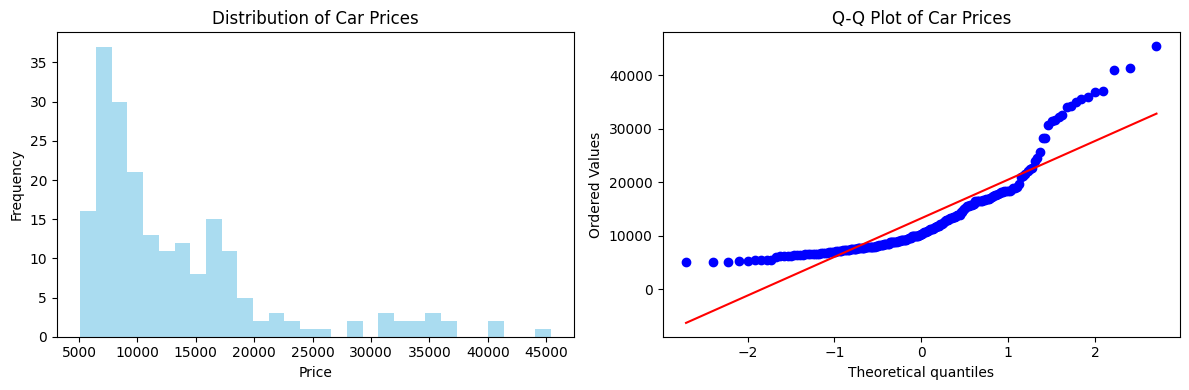

Skewness of price distribution: 1.778
Applied log transformation to target variable

Class distribution (0: Affordable, 1: Expensive):
price
0    103
1    102
Name: count, dtype: int64

After SMOTE:
Original shape: (205, 16)
After SMOTE shape: (206, 16)
Class distribution after SMOTE:
price
1    103
0    103
Name: count, dtype: int64


In [ ]:
print("\n--- Handling Imbalanced Data ---")

# For regression, we typically don't use SMOTE directly on continuous target
# Instead, we can analyze the target distribution and consider transformations

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y, bins=30, alpha=0.7, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
stats.probplot(y, dist="norm", plot=plt)
plt.title('Q-Q Plot of Car Prices')

plt.tight_layout()
plt.show()

# Check if we need to handle skewness
skewness = y.skew()
print(f"Skewness of price distribution: {skewness:.3f}")

if abs(skewness) > 1:
    # Apply log transformation for highly skewed data
    y_transformed = np.log1p(y)
    print("Applied log transformation to target variable")
else:
    y_transformed = y.copy()
    print("No transformation needed for target variable")

# For demonstration, let's create a classification problem to show SMOTE
# Convert to classification: Expensive vs Affordable
price_threshold = y.median()
y_class = (y > price_threshold).astype(int)

print(f"\nClass distribution (0: Affordable, 1: Expensive):")
print(y_class.value_counts())

# Apply SMOTE for the classification problem
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_final, y_class)

print(f"\nAfter SMOTE:")
print(f"Original shape: {X_final.shape}")
print(f"After SMOTE shape: {X_smote.shape}")
print("Class distribution after SMOTE:")
print(pd.Series(y_smote).value_counts())


Regression Models and Evaluation

In [ ]:
print("\n--- Regression Models and Evaluation ---")

# Prepare data for regression (using original continuous target)
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# Also create a version with transformed target for comparison
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(
    X_final, y_transformed, test_size=0.2, random_state=42
)

# Dictionary to store results
results = {}

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, results_dict):
    """Helper function to evaluate regression models"""
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store results
    results_dict[model_name] = {
        'r2_score': r2,
        'mse': mse,
        'mae': mae,
        'rmse': rmse,
        'model': model
    }

    print(f"\n{model_name} Results:")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

    return y_pred

# 7. Simple Linear Regression (using most correlated feature)
most_correlated_feature = price_correlation.index[1]  # Skip 'price' itself
print(f"\nSimple Linear Regression using: {most_correlated_feature}")

X_simple_train = X_train[[most_correlated_feature]]
X_simple_test = X_test[[most_correlated_feature]]

simple_lr = LinearRegression()
y_pred_simple = evaluate_model(simple_lr, X_simple_train, X_simple_test,
                             y_train, y_test, "Simple Linear Regression", results)

# 8. Multiple Linear Regression
multiple_lr = LinearRegression()
y_pred_multiple = evaluate_model(multiple_lr, X_train, X_test,
                               y_train, y_test, "Multiple Linear Regression", results)

# 9. Polynomial Regression
print("\n--- Polynomial Regression ---")
degrees = [2, 3]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    poly_lr = LinearRegression()
    y_pred_poly = evaluate_model(poly_lr, X_poly_train, X_poly_test,
                               y_train, y_test, f"Polynomial Regression (deg {degree})", results)

# 10. Regularization Models
print("\n--- Regularization Models ---")

# Ridge Regression
ridge = Ridge(alpha=1.0)
y_pred_ridge = evaluate_model(ridge, X_train, X_test,
                            y_train, y_test, "Ridge Regression", results)

# Lasso Regression
lasso = Lasso(alpha=0.1)
y_pred_lasso = evaluate_model(lasso, X_train, X_test,
                            y_train, y_test, "Lasso Regression", results)

# Compare all models
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'R² Score': [results[model]['r2_score'] for model in results],
    'MSE': [results[model]['mse'] for model in results],
    'MAE': [results[model]['mae'] for model in results],
    'RMSE': [results[model]['rmse'] for model in results]
}).sort_values('R² Score', ascending=False)

print(comparison_df.round(4))


--- Regression Models and Evaluation ---

Simple Linear Regression using: enginesize

Simple Linear Regression Results:
R² Score: 0.8041
MSE: 15465458.97
MAE: 2748.69
RMSE: 3932.61

Multiple Linear Regression Results:
R² Score: 0.8567
MSE: 11310643.74
MAE: 2501.52
RMSE: 3363.13

--- Polynomial Regression ---

Polynomial Regression (deg 2) Results:
R² Score: -322.0081
MSE: 25499555997.11
MAE: 38843.13
RMSE: 159685.80

Polynomial Regression (deg 3) Results:
R² Score: -311294727440.9130
MSE: 24574857462901727232.00
MAE: 775417200.59
RMSE: 4957303446.72

--- Regularization Models ---

Ridge Regression Results:
R² Score: 0.8693
MSE: 10318934.13
MAE: 2319.86
RMSE: 3212.31

Lasso Regression Results:
R² Score: 0.8568
MSE: 11301785.59
MAE: 2500.00
RMSE: 3361.81

MODEL COMPARISON SUMMARY
                           Model      R² Score           MSE           MAE  \
4               Ridge Regression  8.693000e-01  1.031893e+07  2.319855e+03   
5               Lasso Regression  8.568000e-01  1.1301